# Importing the required library

In [1]:
rm -rf /kaggle/working/*

In [2]:
!pip install ultralytics comet_ml

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 973.0/973.0 kB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 726.7/726.7 kB 31.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 41.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 70.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.0/138.0 kB 7.1 MB/s eta 0:00:00
  Attempting uninstall: python-box
    Found existing installation: python-box 7.3.0
    Uninstalling python-box-7.3.0:
      Successfully uninstalled python-box-7.3.0


In [3]:
import csv
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from ultralytics import YOLO
from pathlib import Path
import os
import yaml
from PIL import Image
from collections import Counter

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


# Creating data.yaml file for training

In [4]:
# with open("yolo_params.yaml", "w") as f:
#     f.write("""
# # Dataset paths
# train: /kaggle/input/falcon-object-detection/ObjectDetectionDataset/train/images  # Path to training images
# val: /kaggle/input/falcon-object-detection/ObjectDetectionDataset/val/images      # Path to validation images
# test: /kaggle/input/synthetic-2-real-object-detection-challenge/Synthetic to Real Object Detection Challenge/data/test    # Path to test images

# # Class information
# nc: 1                     # Number of classes
# names: ['cheerios']       # Class names
# """)

In [5]:
!wget -O ObjectDetectionDataset.zip "https://storage.googleapis.com/duality-public-share/Datasets/ObjectDetectionDataset.zip"

--2025-04-10 17:28:51--  https://storage.googleapis.com/duality-public-share/Datasets/ObjectDetectionDataset.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.179.207, 74.125.201.207, 173.194.194.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.179.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3551265877 (3.3G) [application/x-zip-compressed]
Saving to: ‘ObjectDetectionDataset.zip’

ObjectDetectionData 100%[===================>]   3.31G   156MB/s    in 21s     

2025-04-10 17:29:12 (161 MB/s) - ‘ObjectDetectionDataset.zip’ saved [3551265877/3551265877]



In [6]:
import zipfile

with zipfile.ZipFile("ObjectDetectionDataset.zip", "r") as zip_ref:
    zip_ref.extractall("./")  # Extract to the current directory

print("Dataset extracted successfully! ✅")

Dataset extracted successfully! ✅


In [7]:
data_yaml = """
path: /kaggle/working/ObjectDetectionDataset

train: train/images
val: val/images

nc: 1
names: ['cheerios']
"""

# Dosyayı kaydet
with open('data.yaml', 'w') as file:
    file.write(data_yaml)

# Training

In [8]:
model = YOLO("yolov8x.pt")

100%|██████████| 131M/131M [00:00<00:00, 225MB/s]


In [9]:
import torch
torch.cuda.empty_cache()
torch.cuda.reset_peak_memory_stats()

In [10]:
model.train(
    data="data.yaml",
    epochs=100,  # Increased for better convergence
    imgsz=640,
    patience=20,
    batch=8,  # Smaller batch size for better gradient estimation
    lr0=0.0001,  # Lower initial learning rate
    optimizer="SGD",
    cos_lr=True,  # Early stopping patience
    augment=True,
    # # Augmentation adjustments
    scale=1.0,  # More aggressive scaling for partial visibility
    # translate=0.1,  # Add translation augmentation
    # fliplr=0.4, flipud=0.3,  # Reduced flip probability
    mosaic=0.2,  # Slightly reduced mosaic
    mixup=0.2,  # Reduced mixup
    copy_paste=0.1,  # Add copy-paste augmentation
    erasing=0.3,  # Random erasing for occlusion simulation
    flipud=0.25,
    # Detection parameters
    conf=0.5,  # Lower confidence threshold
    iou=0.5,  # Higher IoU threshold for stricter matching
    overlap_mask=True,
    single_cls=True,  # Explicit single-class mode
    momentum=0.975,
    weight_decay=0.0001,
    # Regularization
    dropout=0.4,  # Add dropout for regularization
    # Optimization
    nbs=64,  # Nominal batch size
    # Data handling
    cache="disk",  # More stable caching
    workers=8,  # Optimal for most systems
    # Model saving
    save=True,
    save_period=25,  # More frequent checkpoints
    deterministic=True,  # Reproducibility
)

Ultralytics 8.3.106 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=data.yaml, epochs=100, time=None, patience=20, batch=8, imgsz=640, save=True, save_period=25, cache=disk, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=True, rect=False, cos_lr=True, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.4, val=True, split=val, save_json=False, conf=0.5, iou=0.5, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, format=torchscript

100%|██████████| 755k/755k [00:00<00:00, 17.6MB/s]

Overriding class names with single class.


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1      2320  ultralytics.nn.modules.conv.Conv             [3, 80, 3, 2]                 
  1                  -1  1    115520  ultralytics.nn.modules.conv.Conv             [80, 160, 3, 2]               
  2                  -1  3    436800  ultralytics.nn.modules.block.C2f             [160, 160, 3, True]           
  3                  -1  1    461440  ultralytics.nn.modules.conv.Conv             [160, 320, 3, 2]              
  4                  -1  6   3281920  ultralytics.nn.modules.block.C2f             [320, 320, 6, True]           
  5                  -1  1   1844480  ultralytics.nn.modules.conv.Conv             [320, 640, 3, 2]              
  6                  -1  6  13117440  ultralytics.nn.modules.block.C2f             [640, 640, 6, True]           
  7                  -1  1   3687680  ultralytics

COMET ERROR: Failed to create Comet experiment, reason: ValueError('Comet.ml requires an API key. Please provide as the first argument to Experiment(api_key) or as an environment variable named COMET_API_KEY ')


WARNING ⚠️ Comet installed but not initialized correctly, not logging this run. Comet.ml requires an API key. Please provide as the first argument to Experiment(api_key) or as an environment variable named COMET_API_KEY 
TensorBoard: Start with 'tensorboard --logdir runs/detect/train', view at http://localhost:6006/
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 73.9MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/working/ObjectDetectionDataset/train/labels... 862 images, 12 backgrounds, 0 corrupt: 100%|██████████| 862/862 [00:02<00:00, 349.39it/s]

train: New cache created: /kaggle/working/ObjectDetectionDataset/train/labels.cache



train: Caching images (5.0GB Disk): 100%|██████████| 862/862 [00:25<00:00, 34.43it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.5 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /kaggle/working/ObjectDetectionDataset/val/labels... 138 images, 2 backgrounds, 0 corrupt: 100%|██████████| 138/138 [00:00<00:00, 239.83it/s]

val: New cache created: /kaggle/working/ObjectDetectionDataset/val/labels.cache



val: Caching images (0.8GB Disk): 100%|██████████| 138/138 [00:03<00:00, 35.14it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: SGD(lr=0.0001, momentum=0.975) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0001), 103 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      6.95G     0.4885      3.538       0.93          6        640: 100%|██████████| 108/108 [01:08<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.35it/s]

                   all        138        136      0.392      0.279      0.281      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100       7.2G     0.4334      2.373     0.8891          6        640: 100%|██████████| 108/108 [01:16<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.30it/s]

                   all        138        136      0.596      0.532        0.6      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100       7.2G     0.3828      1.648     0.8621          8        640: 100%|██████████| 108/108 [01:15<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.25it/s]

                   all        138        136      0.759       0.75      0.822      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100       7.2G      0.373      1.074     0.8669          7        640: 100%|██████████| 108/108 [01:15<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.23it/s]

                   all        138        136      0.906      0.831      0.909      0.904



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100       7.2G     0.3435     0.6938     0.8678         11        640: 100%|██████████| 108/108 [01:15<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.21it/s]

                   all        138        136       0.93      0.886      0.963       0.96



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100       7.2G     0.3256     0.5404     0.8591          6        640: 100%|██████████| 108/108 [01:15<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.23it/s]

                   all        138        136      0.934      0.926      0.977      0.974



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100       7.2G     0.3475     0.4654      0.864         10        640: 100%|██████████| 108/108 [01:15<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.21it/s]

                   all        138        136      0.935      0.963      0.979      0.974



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100       7.2G     0.3247      0.405     0.8459         11        640: 100%|██████████| 108/108 [01:15<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.23it/s]

                   all        138        136       0.95      0.971      0.989      0.983



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100       7.2G     0.3219     0.3739      0.838          8        640: 100%|██████████| 108/108 [01:15<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.23it/s]

                   all        138        136       0.96      0.971      0.989      0.983



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100       7.2G     0.2969      0.313     0.8482         10        640: 100%|██████████| 108/108 [01:15<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.21it/s]

                   all        138        136      0.953      0.963      0.983      0.982



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100       7.2G     0.2943     0.2957     0.8335         10        640: 100%|██████████| 108/108 [01:15<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.24it/s]

                   all        138        136      0.971      0.968      0.984      0.983



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100       7.2G     0.3027     0.2937     0.8405         15        640: 100%|██████████| 108/108 [01:15<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.23it/s]

                   all        138        136      0.991      0.978      0.991      0.986



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100       7.2G     0.3066     0.2812      0.836          9        640: 100%|██████████| 108/108 [01:15<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.22it/s]

                   all        138        136      0.978      0.967      0.987      0.986



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100       7.2G     0.2807     0.2656     0.8167          8        640: 100%|██████████| 108/108 [01:15<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.23it/s]

                   all        138        136      0.979      0.971      0.986      0.985



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100       7.2G     0.3119     0.2564     0.8479         10        640: 100%|██████████| 108/108 [01:15<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.22it/s]

                   all        138        136       0.99      0.978      0.988      0.987



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100       7.2G     0.2897     0.2537     0.8266          9        640: 100%|██████████| 108/108 [01:15<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.24it/s]

                   all        138        136      0.992      0.978      0.991      0.991



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100       7.2G      0.292     0.2449     0.8334          7        640: 100%|██████████| 108/108 [01:15<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.22it/s]

                   all        138        136      0.993      0.984      0.994      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100       7.2G     0.3009     0.2485     0.8421          8        640: 100%|██████████| 108/108 [01:15<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.23it/s]

                   all        138        136      0.993      0.989      0.995      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100       7.2G     0.2923     0.2383     0.8298          8        640: 100%|██████████| 108/108 [01:15<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.22it/s]

                   all        138        136      0.993      0.983      0.991       0.99



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100       7.2G     0.2885     0.2311     0.8151          5        640: 100%|██████████| 108/108 [01:15<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.25it/s]

                   all        138        136      0.996      0.971      0.991       0.99



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100       7.2G     0.2879      0.227     0.8146         10        640: 100%|██████████| 108/108 [01:15<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.22it/s]

                   all        138        136          1      0.975      0.994      0.991



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100       7.2G     0.2883     0.2242     0.8198          7        640: 100%|██████████| 108/108 [01:15<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.23it/s]

                   all        138        136      0.993      0.982      0.995      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100       7.2G     0.2905      0.234     0.8128          7        640: 100%|██████████| 108/108 [01:15<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.22it/s]

                   all        138        136      0.994      0.985      0.995      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100       7.2G     0.2916     0.2251     0.8252          7        640: 100%|██████████| 108/108 [01:15<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.23it/s]

                   all        138        136          1      0.992      0.995      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100       7.2G     0.2754      0.222     0.8165         11        640: 100%|██████████| 108/108 [01:15<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.22it/s]

                   all        138        136          1       0.99      0.995      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100       7.2G     0.2812     0.2209     0.8154         12        640: 100%|██████████| 108/108 [01:15<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.23it/s]

                   all        138        136      0.999      0.993      0.995      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100       7.2G     0.2817     0.2094     0.8134         12        640: 100%|██████████| 108/108 [01:15<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.23it/s]

                   all        138        136          1      0.993      0.995      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100       7.2G     0.2934     0.2214     0.8099         12        640: 100%|██████████| 108/108 [01:15<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.22it/s]

                   all        138        136      0.999      0.993      0.995      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100       7.2G     0.2873     0.2163      0.812         11        640: 100%|██████████| 108/108 [01:15<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.23it/s]

                   all        138        136      0.999      0.993      0.995      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100       7.2G      0.289     0.2133     0.8203         11        640: 100%|██████████| 108/108 [01:15<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.24it/s]

                   all        138        136      0.999      0.993      0.995      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100       7.2G     0.2762     0.2146     0.8111          8        640: 100%|██████████| 108/108 [01:15<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.21it/s]

                   all        138        136      0.998      0.993      0.995      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100       7.2G     0.2709     0.1997     0.8101         11        640: 100%|██████████| 108/108 [01:15<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.22it/s]

                   all        138        136      0.998      0.993      0.995      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100       7.2G      0.262     0.1981     0.7973          6        640: 100%|██████████| 108/108 [01:15<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.22it/s]

                   all        138        136      0.998      0.993      0.995      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100       7.2G     0.2605     0.1924     0.7985         12        640: 100%|██████████| 108/108 [01:15<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.21it/s]

                   all        138        136      0.999      0.993      0.995      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100       7.2G     0.2755     0.2078     0.8013          9        640: 100%|██████████| 108/108 [01:15<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.22it/s]

                   all        138        136      0.998      0.993      0.995      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100       7.2G     0.2623     0.1905     0.8123         10        640: 100%|██████████| 108/108 [01:15<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.20it/s]

                   all        138        136      0.998      0.993      0.995      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100       7.2G     0.2794     0.1978     0.8138          8        640: 100%|██████████| 108/108 [01:15<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.23it/s]

                   all        138        136      0.998      0.993      0.995      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100       7.2G     0.2526     0.1931     0.7971         12        640: 100%|██████████| 108/108 [01:15<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.20it/s]

                   all        138        136      0.998      0.993      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100       7.2G     0.2534     0.1825     0.8019         11        640: 100%|██████████| 108/108 [01:15<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.21it/s]

                   all        138        136      0.999      0.993      0.995      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100       7.2G     0.2608     0.1909     0.8026          6        640: 100%|██████████| 108/108 [01:15<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.16it/s]

                   all        138        136      0.999      0.993      0.995      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100       7.2G     0.2759     0.2001      0.817          8        640: 100%|██████████| 108/108 [01:15<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.25it/s]

                   all        138        136      0.998      0.993      0.995      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100       7.2G      0.268     0.1973     0.8093          6        640: 100%|██████████| 108/108 [01:15<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.21it/s]

                   all        138        136      0.997      0.993      0.995      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100       7.2G     0.2685      0.206     0.8081          8        640: 100%|██████████| 108/108 [01:15<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.22it/s]

                   all        138        136      0.998      0.993      0.995      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100       7.2G      0.278     0.1997     0.8142          6        640: 100%|██████████| 108/108 [01:15<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.23it/s]

                   all        138        136      0.998      0.993      0.995      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100       7.2G     0.2608     0.1948     0.7922          8        640: 100%|██████████| 108/108 [01:15<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.19it/s]

                   all        138        136      0.998      0.993      0.995      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100       7.2G     0.2451     0.1825      0.798         10        640: 100%|██████████| 108/108 [01:15<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.21it/s]

                   all        138        136      0.998      0.993      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100       7.2G     0.2732     0.2001     0.8048          7        640: 100%|██████████| 108/108 [01:15<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.23it/s]

                   all        138        136      0.998      0.993      0.995      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100       7.2G     0.2581     0.1831     0.8042          7        640: 100%|██████████| 108/108 [01:15<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.22it/s]

                   all        138        136      0.999      0.993      0.995      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100       7.2G     0.2729     0.1902     0.8004          6        640: 100%|██████████| 108/108 [01:15<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.23it/s]

                   all        138        136      0.998      0.993      0.995      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100       7.2G     0.2631      0.191     0.7986          7        640: 100%|██████████| 108/108 [01:15<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.24it/s]

                   all        138        136      0.999      0.993      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100       7.2G     0.2471     0.1798      0.802          5        640: 100%|██████████| 108/108 [01:15<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.22it/s]

                   all        138        136      0.998      0.993      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100       7.2G     0.2603     0.1853      0.795          7        640: 100%|██████████| 108/108 [01:15<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.23it/s]

                   all        138        136      0.998      0.993      0.995      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100       7.2G     0.2571     0.1925     0.8015         14        640: 100%|██████████| 108/108 [01:15<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.21it/s]

                   all        138        136      0.998      0.993      0.995      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100       7.2G     0.2567     0.1819     0.7945          6        640: 100%|██████████| 108/108 [01:15<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.20it/s]

                   all        138        136      0.998      0.993      0.995      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100       7.2G     0.2556     0.1834     0.7969          6        640: 100%|██████████| 108/108 [01:15<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.24it/s]

                   all        138        136      0.998      0.993      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100       7.2G     0.2496     0.1804      0.809          9        640: 100%|██████████| 108/108 [01:15<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.22it/s]

                   all        138        136      0.998      0.993      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100       7.2G     0.2641      0.182     0.7953          7        640: 100%|██████████| 108/108 [01:15<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.20it/s]

                   all        138        136      0.998      0.993      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100       7.2G     0.2434     0.1805     0.7973          9        640: 100%|██████████| 108/108 [01:15<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.20it/s]

                   all        138        136      0.998      0.993      0.995      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100       7.2G     0.2501     0.1792     0.8041          7        640: 100%|██████████| 108/108 [01:14<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.24it/s]

                   all        138        136      0.999      0.993      0.995      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100       7.2G     0.2577     0.1771     0.7941          6        640: 100%|██████████| 108/108 [01:15<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.22it/s]

                   all        138        136      0.999      0.993      0.995      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100       7.2G     0.2592     0.1758     0.8117          8        640: 100%|██████████| 108/108 [01:15<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.21it/s]

                   all        138        136      0.999      0.993      0.995      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100       7.2G     0.2545     0.1776     0.8056          7        640: 100%|██████████| 108/108 [01:15<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.22it/s]

                   all        138        136      0.999      0.993      0.995      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100       7.2G      0.257     0.1726     0.8101         11        640: 100%|██████████| 108/108 [01:14<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.23it/s]

                   all        138        136      0.999      0.993      0.995      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100       7.2G     0.2482     0.1751     0.8007          6        640: 100%|██████████| 108/108 [01:15<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.23it/s]

                   all        138        136      0.999      0.993      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100       7.2G      0.247     0.1731     0.8007         14        640: 100%|██████████| 108/108 [01:15<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.21it/s]

                   all        138        136      0.999      0.993      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100       7.2G     0.2573     0.1786     0.8001          7        640: 100%|██████████| 108/108 [01:15<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.23it/s]

                   all        138        136      0.999      0.993      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100       7.2G     0.2396     0.1672     0.7972          5        640: 100%|██████████| 108/108 [01:15<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.22it/s]

                   all        138        136      0.999      0.993      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100       7.2G     0.2543     0.1759      0.793          7        640: 100%|██████████| 108/108 [01:15<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.23it/s]

                   all        138        136      0.999      0.993      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100       7.2G     0.2479     0.1679     0.7969          7        640: 100%|██████████| 108/108 [01:15<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.18it/s]

                   all        138        136          1      0.993      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100       7.2G     0.2493     0.1645     0.7961          7        640: 100%|██████████| 108/108 [01:15<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.17it/s]

                   all        138        136          1      0.993      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100       7.2G     0.2506     0.1694     0.8035         11        640: 100%|██████████| 108/108 [01:15<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.18it/s]

                   all        138        136          1      0.993      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100       7.2G     0.2507     0.1674     0.7997          6        640: 100%|██████████| 108/108 [01:15<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.17it/s]

                   all        138        136          1      0.993      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100       7.2G     0.2574     0.1801     0.7983          6        640: 100%|██████████| 108/108 [01:16<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.14it/s]

                   all        138        136      0.999      0.993      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100       7.2G     0.2551     0.1732     0.8069          6        640: 100%|██████████| 108/108 [01:15<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.20it/s]

                   all        138        136      0.999      0.993      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100       7.2G     0.2361     0.1631     0.7967          5        640: 100%|██████████| 108/108 [01:15<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.16it/s]

                   all        138        136      0.999      0.993      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100       7.2G     0.2405     0.1612     0.7949          9        640: 100%|██████████| 108/108 [01:15<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.06it/s]

                   all        138        136      0.999      0.993      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100       7.2G     0.2541     0.1706     0.7984          7        640: 100%|██████████| 108/108 [01:15<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.13it/s]

                   all        138        136      0.999      0.993      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100       7.2G      0.234     0.1639     0.7828          9        640: 100%|██████████| 108/108 [01:15<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.16it/s]

                   all        138        136      0.999      0.993      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100       7.2G      0.255     0.1717     0.8013          9        640: 100%|██████████| 108/108 [01:15<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.18it/s]

                   all        138        136          1      0.993      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100       7.2G     0.2437     0.1636     0.7987          6        640: 100%|██████████| 108/108 [01:15<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.18it/s]

                   all        138        136      0.999      0.993      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100       7.2G     0.2555     0.1668     0.8021         14        640: 100%|██████████| 108/108 [01:15<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.13it/s]

                   all        138        136      0.999      0.993      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100       7.2G     0.2402     0.1673     0.8005          6        640: 100%|██████████| 108/108 [01:15<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.17it/s]

                   all        138        136      0.999      0.993      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100       7.2G     0.2345     0.1641     0.8053          6        640: 100%|██████████| 108/108 [01:15<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.02it/s]

                   all        138        136      0.999      0.993      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100       7.2G     0.2589     0.1739     0.8011          7        640: 100%|██████████| 108/108 [01:16<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.13it/s]

                   all        138        136      0.999      0.993      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100       7.2G     0.2392     0.1628     0.7995          9        640: 100%|██████████| 108/108 [01:15<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.20it/s]

                   all        138        136      0.999      0.993      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100       7.2G     0.2316     0.1503     0.7935          7        640: 100%|██████████| 108/108 [01:15<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.15it/s]

                   all        138        136      0.998      0.993      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100       7.2G     0.2287     0.1548     0.7979          7        640: 100%|██████████| 108/108 [01:15<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.15it/s]

                   all        138        136      0.999      0.993      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100       7.2G     0.2412     0.1601     0.7965          9        640: 100%|██████████| 108/108 [01:15<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.13it/s]

                   all        138        136      0.998      0.993      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100       7.2G     0.2342      0.165     0.7868          7        640: 100%|██████████| 108/108 [01:15<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.14it/s]

                   all        138        136      0.999      0.993      0.995      0.995
EarlyStopping: Training stopped early as no improvement observed in last 20 epochs. Best results observed at epoch 69, best model saved as best.pt.
To update EarlyStopping(patience=20) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



89 epochs completed in 1.966 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 136.7MB
Optimizer stripped from runs/detect/train/weights/best.pt, 136.7MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.106 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 112 layers, 68,124,531 parameters, 0 gradients, 257.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.40it/s]


                   all        138        136          1      0.993      0.995      0.993


/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.1ms preprocess, 41.1ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e408a263820>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

# Visualizing training metrics and losses

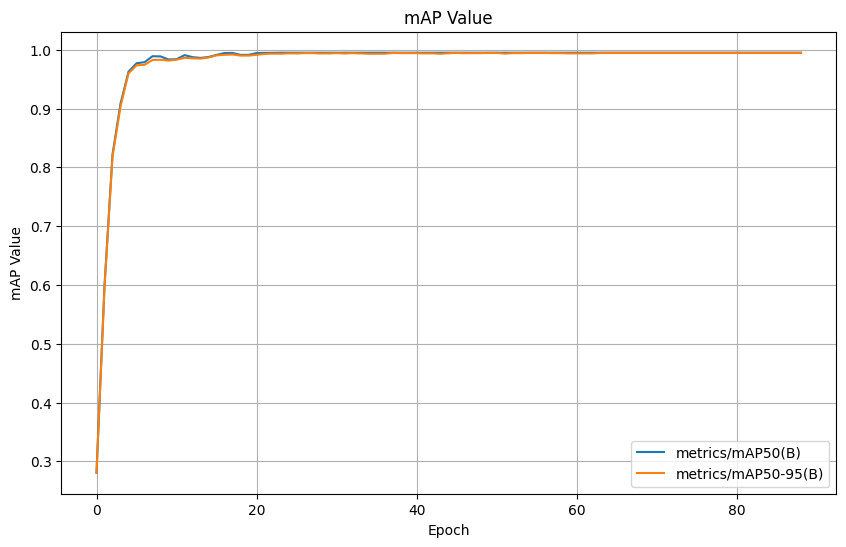

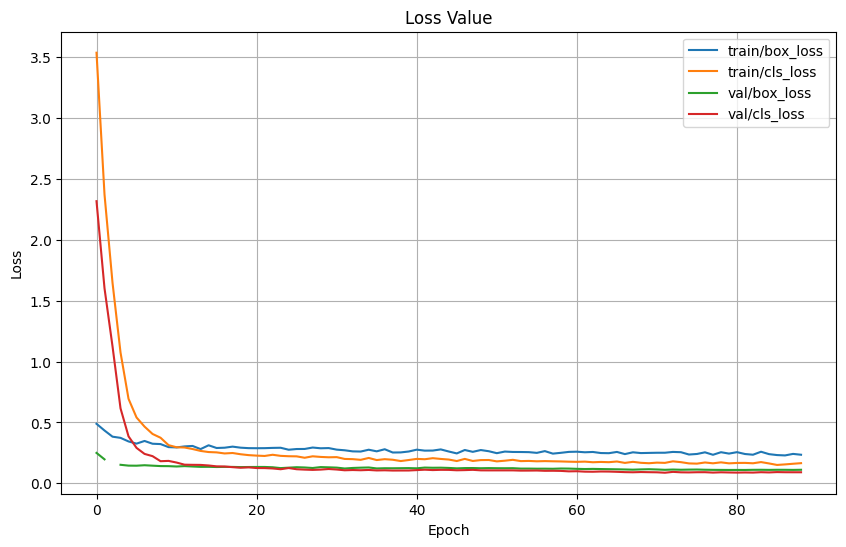

In [11]:
metrics_path = "/kaggle/working/runs/detect/train/results.csv"
metrics = pd.read_csv(metrics_path)

metrics[['metrics/mAP50(B)', 'metrics/mAP50-95(B)']].plot(figsize=(10, 6))
plt.title("mAP Value")
plt.xlabel("Epoch")
plt.ylabel("mAP Value")
plt.grid()
plt.show()


metrics[['train/box_loss', 'train/cls_loss', 'val/box_loss', 'val/cls_loss']].plot(figsize=(10, 6))
plt.title("Loss Value")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid()
plt.show()

# Testing the trained YOLOv8 model and saving predictions

In [12]:
from ultralytics import YOLO
import os
from pathlib import Path
import torch

model = YOLO('/kaggle/working/runs/detect/train/weights/best.pt')

test_images_path = "/kaggle/input/synthetic-2-real-object-detection-challenge/Synthetic to Real Object Detection Challenge/data/test/images"
output_dir = "/kaggle/working/predictions/labels"

os.makedirs(output_dir, exist_ok=True)

for img_path in Path(test_images_path).glob("*"):
    if img_path.suffix.lower() not in ['.png', '.jpg', '.jpeg']:
        continue

    results = model.predict(img_path, conf=0.05)  # Set min conf here

    output_txt = Path(output_dir) / f"{img_path.stem}.txt"

    with open(output_txt, "w") as f:
        for result in results:
            img_height, img_width = result.orig_shape

            boxes = result.boxes.data

            if len(boxes) == 0:
                continue  # No predictions

            # Filter boxes with conf >= 0.05
            filtered_boxes = boxes[boxes[:, 4] >= 0.05]

            if len(filtered_boxes) == 0:
                continue  # No box passes threshold

            # Get the box with the highest confidence
            best_box = filtered_boxes[filtered_boxes[:, 4].argmax()]

            x1, y1, x2, y2, confidence, cls_id = best_box.tolist()

            x_center = ((x1 + x2) / 2) / img_width
            y_center = ((y1 + y2) / 2) / img_height
            width = (x2 - x1) / img_width
            height = (y2 - y1) / img_height

            # Save in YOLO format: class_id confidence x_center y_center width height
            f.write(f"0 {confidence:.6f} {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}\n")

print(f"[notice] ✅ Tahminler kaydedildi: {output_dir}")


image 1/1 /kaggle/input/synthetic-2-real-object-detection-challenge/Synthetic to Real Object Detection Challenge/data/test/images/0106.jpg: 640x384 1 item, 66.9ms
Speed: 2.8ms preprocess, 66.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 384)

image 1/1 /kaggle/input/synthetic-2-real-object-detection-challenge/Synthetic to Real Object Detection Challenge/data/test/images/IMG_3114.jpg: 640x640 2 items, 60.9ms
Speed: 1.8ms preprocess, 60.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /kaggle/input/synthetic-2-real-object-detection-challenge/Synthetic to Real Object Detection Challenge/data/test/images/0273.jpg: 640x384 1 item, 37.5ms
Speed: 2.4ms preprocess, 37.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 384)

image 1/1 /kaggle/input/synthetic-2-real-object-detection-challenge/Synthetic to Real Object Detection Challenge/data/test/images/0255.jpg: 640x384 2 items, 35.0ms
Speed: 2.4ms preprocess, 35.0ms inference, 1.7m

# Convert the predictions into a csv file

In [13]:
import os

file_path = "/kaggle/working/submission.csv"

if os.path.exists(file_path):
    os.remove(file_path)
    print(f"[notice] ✅ File removed: {file_path}")
else:
    print(f"[warn] ⚠️ File not found: {file_path}")

[warn] ⚠️ File not found: /kaggle/working/submission.csv


In [14]:
def predictions_to_csv(
    preds_folder: str = "/kaggle/working/predictions/labels", 
    output_csv: str = "/kaggle/working/submission.csv", 
    test_images_folder: str = "/kaggle/working/data_augmented/test/images",
    allowed_extensions: tuple = (".jpg", ".png", ".jpeg")
):
    preds_path = Path(preds_folder)
    test_images_path = Path(test_images_folder)

    test_images = {p.stem for p in test_images_path.glob("*") if p.suffix.lower() in allowed_extensions}

    predictions = []
    predicted_images = set()

    for txt_file in preds_path.glob("*.txt"):
        image_id = txt_file.stem
        predicted_images.add(image_id)

        with open(txt_file, "r") as f:
            valid_lines = [line.strip() for line in f if len(line.strip().split()) == 6]

        pred_str = " ".join(valid_lines) if valid_lines else "no boxes"
        predictions.append({"image_id": image_id, "prediction_string": pred_str})

    missing_images = test_images - predicted_images
    for image_id in missing_images:
        predictions.append({"image_id": image_id, "prediction_string": "no boxes"})

    submission_df = pd.DataFrame(predictions)
    submission_df.to_csv(output_csv, index=False, quoting=csv.QUOTE_MINIMAL)

    print(f"[notice] ✅ Submission saved to {output_csv}")


predictions_to_csv()

[notice] ✅ Submission saved to /kaggle/working/submission.csv
